In [1]:
import prospectdataset
import pandas as pd
import numpy as np
import os
import re
from collections import Counter
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import glob
files = glob.glob("./data/*.parquet")

# 
#files = glob.glob("./data/TMT_TUM_aspn_meta_data.parquet")

In [3]:
len(files)

38

In [4]:
def get_aa_ptm_matrix_counts(metadata_files=[]):
    
    counter = Counter()
    # Pattern to match the desired substring and extract information
    pattern = r"(.)(?=\[UNIMOD:(\d+)\])"
    
    for filepath in metadata_files:
        df = pd.read_parquet(filepath)
        
        df.loc[df.modified_sequence.str.startswith("["), "modified_sequence"] = df[df.modified_sequence.str.startswith("[")].modified_sequence.apply(lambda x: "-"+x)
        
        occurences = df.modified_sequence[df.modified_sequence.str.contains("UNIMOD")].apply(
            lambda x: [m.group(1)+m.group(2) for m in re.finditer(pattern, x)]
        )
        
        counter.update(list(chain.from_iterable(occurences)))
    return counter


        
counter = get_aa_ptm_matrix_counts(files)


# update counter ] replace with K
# replace - with N terminal




In [5]:
counter

Counter({'M35': 3333261,
         'C4': 1398912,
         'K121': 3334503,
         'S21': 1730657,
         'R36': 72742,
         'T43': 504292,
         'S43': 415903,
         'K1363': 48480,
         '-1': 297117,
         'R7': 228274,
         'Q28': 358872,
         'T21': 511428,
         'K36': 39226,
         'K3': 25703,
         'P35': 31494,
         'K1849': 48390,
         'K122': 50308,
         'K1': 3420028,
         'K747': 34981,
         'Y21': 4822786,
         'E27': 172812,
         'R34': 1983945,
         'K34': 221314,
         'Y354': 58528,
         'K37': 38082,
         'K1848': 52873,
         'K64': 46910,
         'K1289': 47538,
         'K58': 56469})

In [6]:
def lookup_mod_names(unique_mods):
    from pyteomics.mass.unimod import Unimod
    new_db = Unimod()
    
    unique_mods_names = []
    for mod_id in unique_mods:
        unimod_lookup = new_db.get(int(mod_id))
        if unimod_lookup:
            print("Found in unimod: ", mod_id)
            print(unimod_lookup)
            unique_mods_names.append(unimod_lookup.code_name)
        else:
            print("NOT Found in unimod: ", mod_id)
            unique_mods_names.append(mod_id)
        print("-"*50)
    return unique_mods_names 

In [24]:
unique_aas = sorted(np.unique([k[0] for k in counter.keys()]))
unique_mods = sorted(np.unique([int(k[1:]) for k in counter.keys()]))
unique_mods_names = lookup_mod_names(unique_mods)

data = np.ones((len(unique_aas), len(unique_mods_names)))

for i, aa in enumerate(unique_aas):
    for j, m in enumerate(unique_mods):
        data[i, j] = np.log10(counter.get(aa+str(m), 1))

Found in unimod:  1
Modification(id=1, average_mass=42.0367, monoisotopic_mass=42.010565, full_name='Acetylation', composition=Composition({'H': 2, 'C': 2, 'O': 1}), username_of_poster='unimod', approved=True, code_name='Acetyl', ex_code_name='Acetyl')
--------------------------------------------------
Found in unimod:  3
Modification(code_name='Biotin', monoisotopic_mass=226.077598, average_mass=226.2954, id=3, ex_code_name='Biotin', full_name='Biotinylation', approved=True, username_of_poster='unimod', composition=Composition({'H': 14, 'C': 10, 'N': 2, 'O': 2, 'S': 1}))
--------------------------------------------------
Found in unimod:  4
Modification(monoisotopic_mass=57.021464, average_mass=57.0513, full_name='Iodoacetamide derivative', composition=Composition({'H': 3, 'C': 2, 'N': 1, 'O': 1}), ex_code_name='Carbamidomethyl', id=4, approved=True, code_name='Carbamidomethyl', username_of_poster='unimod')
--------------------------------------------------
Found in unimod:  7
Modific

In [25]:
[(x,y) for x,y in zip(unique_mods_names, unique_mods)]

[('Acetyl', 1),
 ('Biotin', 3),
 ('Carbamidomethyl', 4),
 ('Deamidation', 7),
 ('Phospho', 21),
 ('Pyro_glu', 27),
 ('Pyro-glu', 28),
 ('Methyl', 34),
 ('Hydroxylation', 35),
 ('di-Methylation', 36),
 ('tri-Methylation', 37),
 ('HexNAc', 43),
 ('Propionyl_light', 58),
 ('Suc_anh_light', 64),
 ('GlyGly', 121),
 ('Formyl', 122),
 ('Nitro', 354),
 ('Malonyl', 747),
 ('Butyryl', 1289),
 ('Crotonyl', 1363),
 ('Gluratylation', 1848),
 ('hydroxyisobutyryl', 1849)]

In [26]:
unique_mods_names

['Acetyl',
 'Biotin',
 'Carbamidomethyl',
 'Deamidation',
 'Phospho',
 'Pyro_glu',
 'Pyro-glu',
 'Methyl',
 'Hydroxylation',
 'di-Methylation',
 'tri-Methylation',
 'HexNAc',
 'Propionyl_light',
 'Suc_anh_light',
 'GlyGly',
 'Formyl',
 'Nitro',
 'Malonyl',
 'Butyryl',
 'Crotonyl',
 'Gluratylation',
 'hydroxyisobutyryl']

In [27]:
len(unique_mods_names)

22

In [45]:
unique_aas[unique_aas.index("N-Term")] = "N-term"

In [43]:
unique_aas[unique_aas.index("-")] = "N-term"

In [33]:
updated_unique_mods_names = ['Acetylation',
 'Biotinylation',
 'Carbamidomethylation',
 'Deamidation',
 'Phosphorylation',
 'Pyro-glu (E)',
 'Pyro-glu (Q)',
 'Methylation',
 'Oxidation or Hydroxylation',
 'di-Methylation',
 'tri-Methylation',
 'OGlcNAc or OGalNAc',
 'Propionylation',
 'Succinylation',
 'Ubiquitinylation',
 'Formylation',
 'Nitro',
 'Malonylation',
 'Butyryllation',
 'Crotonylation',
 'Glutarylation',
 'Hydroxyisobutyrylation']

In [41]:
lookup_dict_updated_names = {x: y for x, y in zip(unique_mods_names, updated_unique_mods_names)}

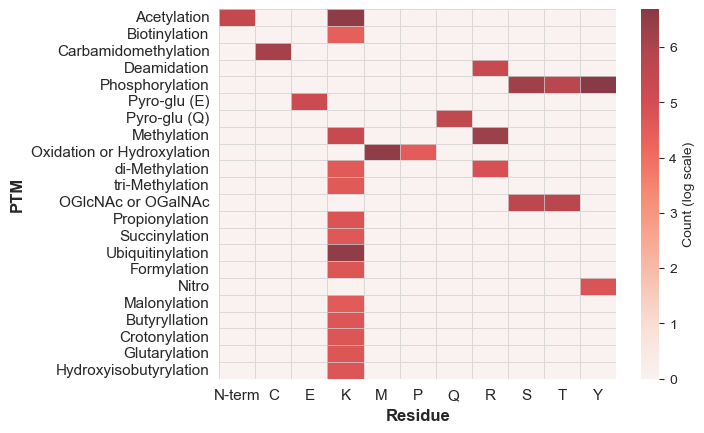

In [46]:
#sns.set(style="ticks")
sns.set_style("darkgrid")
heatmap = sns.heatmap(data.T, cmap="Reds", linewidths=0.5, alpha = 0.75,
                      linecolor="lightgray",
                      cbar_kws={'label': 'Count (log scale)'})#, figsize=(9, 9))


heatmap.set_xticklabels(unique_aas)
heatmap.set_yticklabels(updated_unique_mods_names)
#heatmap.set_yticklabels(["ID:"+str(x) for x in unique_mods])
#heatmap.set_yticklabels(unique_mods_names)

plt.yticks(rotation=0,  fontsize = 11)#, fontweight = "bold")
plt.xticks(rotation=0,  fontsize = 11)#, fontweight = "bold")
plt.xlabel("Residue", fontsize = 12, fontweight = "bold")
plt.ylabel("PTM", fontsize = 12, fontweight = "bold")


#cbar = plt.colorbar(heatmap)
#cbar.ax.set_ylabel('Count (log scale)', rotation=0)


plt.savefig("heatmap.pdf", format="pdf", bbox_inches = "tight")
plt.show()

In [36]:
def get_aas_mods_frequencies(counter):

    frequency_mods = {}
    frequency_aas = {}

    for k, v in counter.items():
        aa = k[0]
        mod = k[1:]
        frequency_mods[mod] = frequency_mods.get(mod, 0) + v
        frequency_aas[aa] = frequency_aas.get(aa, 0) + v
        
    return frequency_aas, frequency_mods

f_aas, f_mods = get_aas_mods_frequencies(counter)

In [37]:
f_aas, f_mods

({'M': 3333261,
  'C': 1398912,
  'K': 7464805,
  'S': 2146560,
  'R': 2284961,
  'T': 1015720,
  '-': 297117,
  'Q': 358872,
  'P': 31494,
  'Y': 4881314,
  'E': 172812},
 {'35': 3364755,
  '4': 1398912,
  '121': 3334503,
  '21': 7064871,
  '36': 111968,
  '43': 920195,
  '1363': 48480,
  '1': 3717145,
  '7': 228274,
  '28': 358872,
  '3': 25703,
  '1849': 48390,
  '122': 50308,
  '747': 34981,
  '27': 172812,
  '34': 2205259,
  '354': 58528,
  '37': 38082,
  '1848': 52873,
  '64': 46910,
  '1289': 47538,
  '58': 56469})

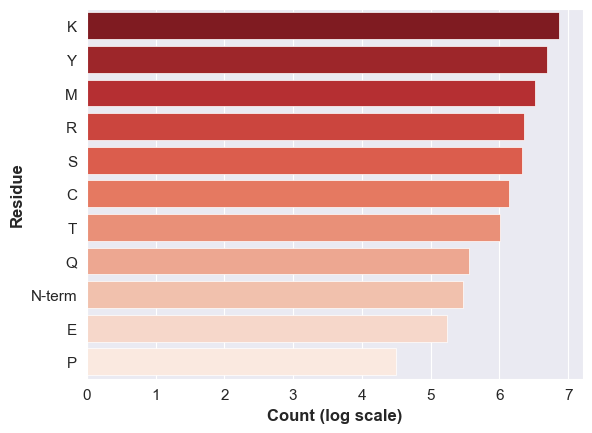

In [48]:
labels = list(f_aas.keys())
bar_sizes = list(f_aas.values())

# Create a DataFrame from the lists
df = pd.DataFrame({'Amino Acid': labels, 'Count': bar_sizes}).sort_values(by = "Count", ascending = False)

df.Count = np.log10(df.Count)
df.loc[df["Amino Acid"] == "-", "Amino Acid"] = "N-term"
# Create horizontal bar plot using Seaborn
#sns.barplot(x='Count', y='Amino Acid', data=df, palette="RdBu_r")
sns.set_style("dark")
sns.barplot(x='Count', y='Amino Acid', data=df, palette="Reds_r", alpha = 1, linewidth = 0.5)
plt.xlabel("Count (log scale)", fontsize = 12, fontweight = "bold")
plt.ylabel("Residue", fontsize = 12, fontweight = "bold")

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.grid(visible = True, axis = "x")
plt.savefig("aa_freq.pdf", format="pdf", bbox_inches="tight")
plt.show()



Found in unimod:  21
Modification(composition=Composition({'H': 1, 'O': 3, 'P': 1}), monoisotopic_mass=79.966331, full_name='Phosphorylation', average_mass=79.9799, id=21, code_name='Phospho', approved=True, username_of_poster='unimod', ex_code_name='Phospho')
--------------------------------------------------
Found in unimod:  1
Modification(id=1, average_mass=42.0367, monoisotopic_mass=42.010565, full_name='Acetylation', composition=Composition({'H': 2, 'C': 2, 'O': 1}), username_of_poster='unimod', approved=True, code_name='Acetyl', ex_code_name='Acetyl')
--------------------------------------------------
Found in unimod:  35
Modification(full_name='Oxidation or Hydroxylation', average_mass=15.9994, ex_code_name='Oxidation', code_name='Hydroxylation', approved=False, id=35, composition=Composition({'O': 1}), monoisotopic_mass=15.994915, username_of_poster='unimod')
--------------------------------------------------
Found in unimod:  121
Modification(ex_code_name='GG', composition=Co

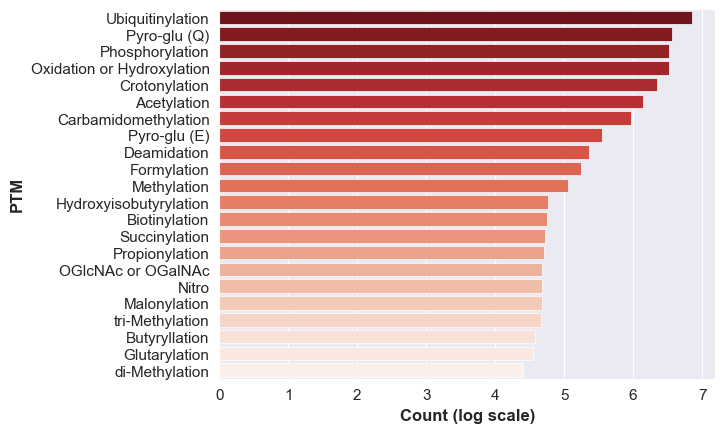

In [42]:
labels = list(f_mods.keys())
bar_sizes = list(f_mods.values())

# Create a DataFrame from the lists
df = pd.DataFrame({'PTM': labels, 'Count': bar_sizes}).sort_values(by = "Count", ascending = False)

df.Count = np.log10(df.Count)

#df.PTM = pd.Series(lookup_mod_names(df.PTM.values))
df.PTM = pd.Series(lookup_mod_names(df.PTM.values)).map(lookup_dict_updated_names)


# Create horizontal bar plot using Seaborn

sns.set_style("dark")
ax = sns.barplot(x='Count', y='PTM', data=df, palette="Reds_r", alpha = 1, linewidth = 0.5)
plt.xlabel("Count (log scale)", fontsize = 12, fontweight = "bold")
plt.ylabel("PTM", fontsize = 12, fontweight = "bold")

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.grid(visible = True, axis = "x")
plt.savefig("ptm_freq.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [7]:
np.log10(30102947)

7.478609013972195